<div style="background-color: rgba(255, 0, 0, 0.5) ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">LOAN STATUS PREDICTION</h1>
    
</div>

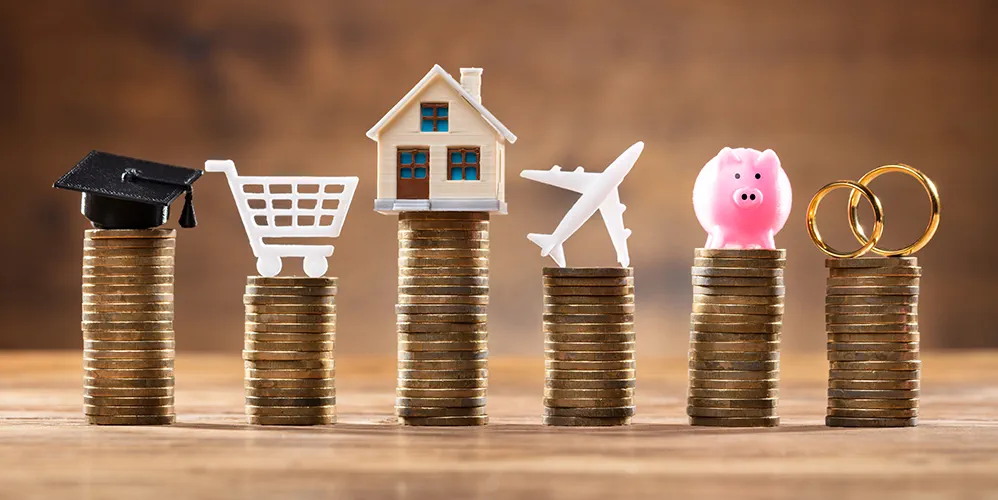

<div style="background-color: rgba(255, 0, 0, 0.5) ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Problem Statement</h1>
    
</div>

### About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

### Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### Attribute information

#### kaggle kernels output ajaymanwani/loan-approval-prediction -p /path/to/dest

<div style="background-color: rgba(255, 0, 0, 0.5) ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Importing Libraries</h1>
    
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as k
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

<div style="background-color: rgba(255, 0, 0, 0.5) ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Loading Dataset</h1>
    
</div>

In [2]:
df = pd.read_csv('./Loan_Status_Prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Observations

1.We can see there are total 13 columns including target variable, all of them are self explanatory.

2.We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns

<div style="background-color: rgba(255, 0, 0, 0.5) ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Data Exploration</h1>
    
</div>

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


#### Lets drop the 'Loan_ID' column as it has no importance

In [5]:
df.drop(columns='Loan_ID', inplace=True)

In [6]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.rename(columns={'ApplicantIncome':'Applicant_Income','CoapplicantIncome':'Coapplicant_Income','LoanAmount':'Loan_Amount'},inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.shape

(614, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         592 non-null    float64
 8   Loan_Amount_Term    600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Property_Area       614 non-null    object 
 11  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Applicant_Income,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
Coapplicant_Income,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
Loan_Amount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [11]:
df['Dependents'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Dependents
Non-Null Count  Dtype 
--------------  ----- 
599 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


In [12]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
df.isna().mean()*100

Gender                2.117264
Married               0.488599
Dependents            2.442997
Education             0.000000
Self_Employed         5.211726
Applicant_Income      0.000000
Coapplicant_Income    0.000000
Loan_Amount           3.583062
Loan_Amount_Term      2.280130
Credit_History        8.143322
Property_Area         0.000000
Loan_Status           0.000000
dtype: float64

In [14]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [15]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.replace({"Dependents":{'3+':3}},inplace=True)

In [18]:
df.replace({"Dependents":{'1':1}},inplace=True)

In [19]:
df.replace({"Dependents":{'2':2}},inplace=True)

In [20]:
df.replace({"Dependents":{'0':0}},inplace=True)

In [21]:
df['Dependents'].info()

<class 'pandas.core.series.Series'>
Int64Index: 480 entries, 1 to 613
Series name: Dependents
Non-Null Count  Dtype
--------------  -----
480 non-null    int64
dtypes: int64(1)
memory usage: 7.5 KB


<div style="background-color: rgba(255, 0, 0, 0.5) ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">EDA</h1>
    
</div>

### Plotting Categorical Data

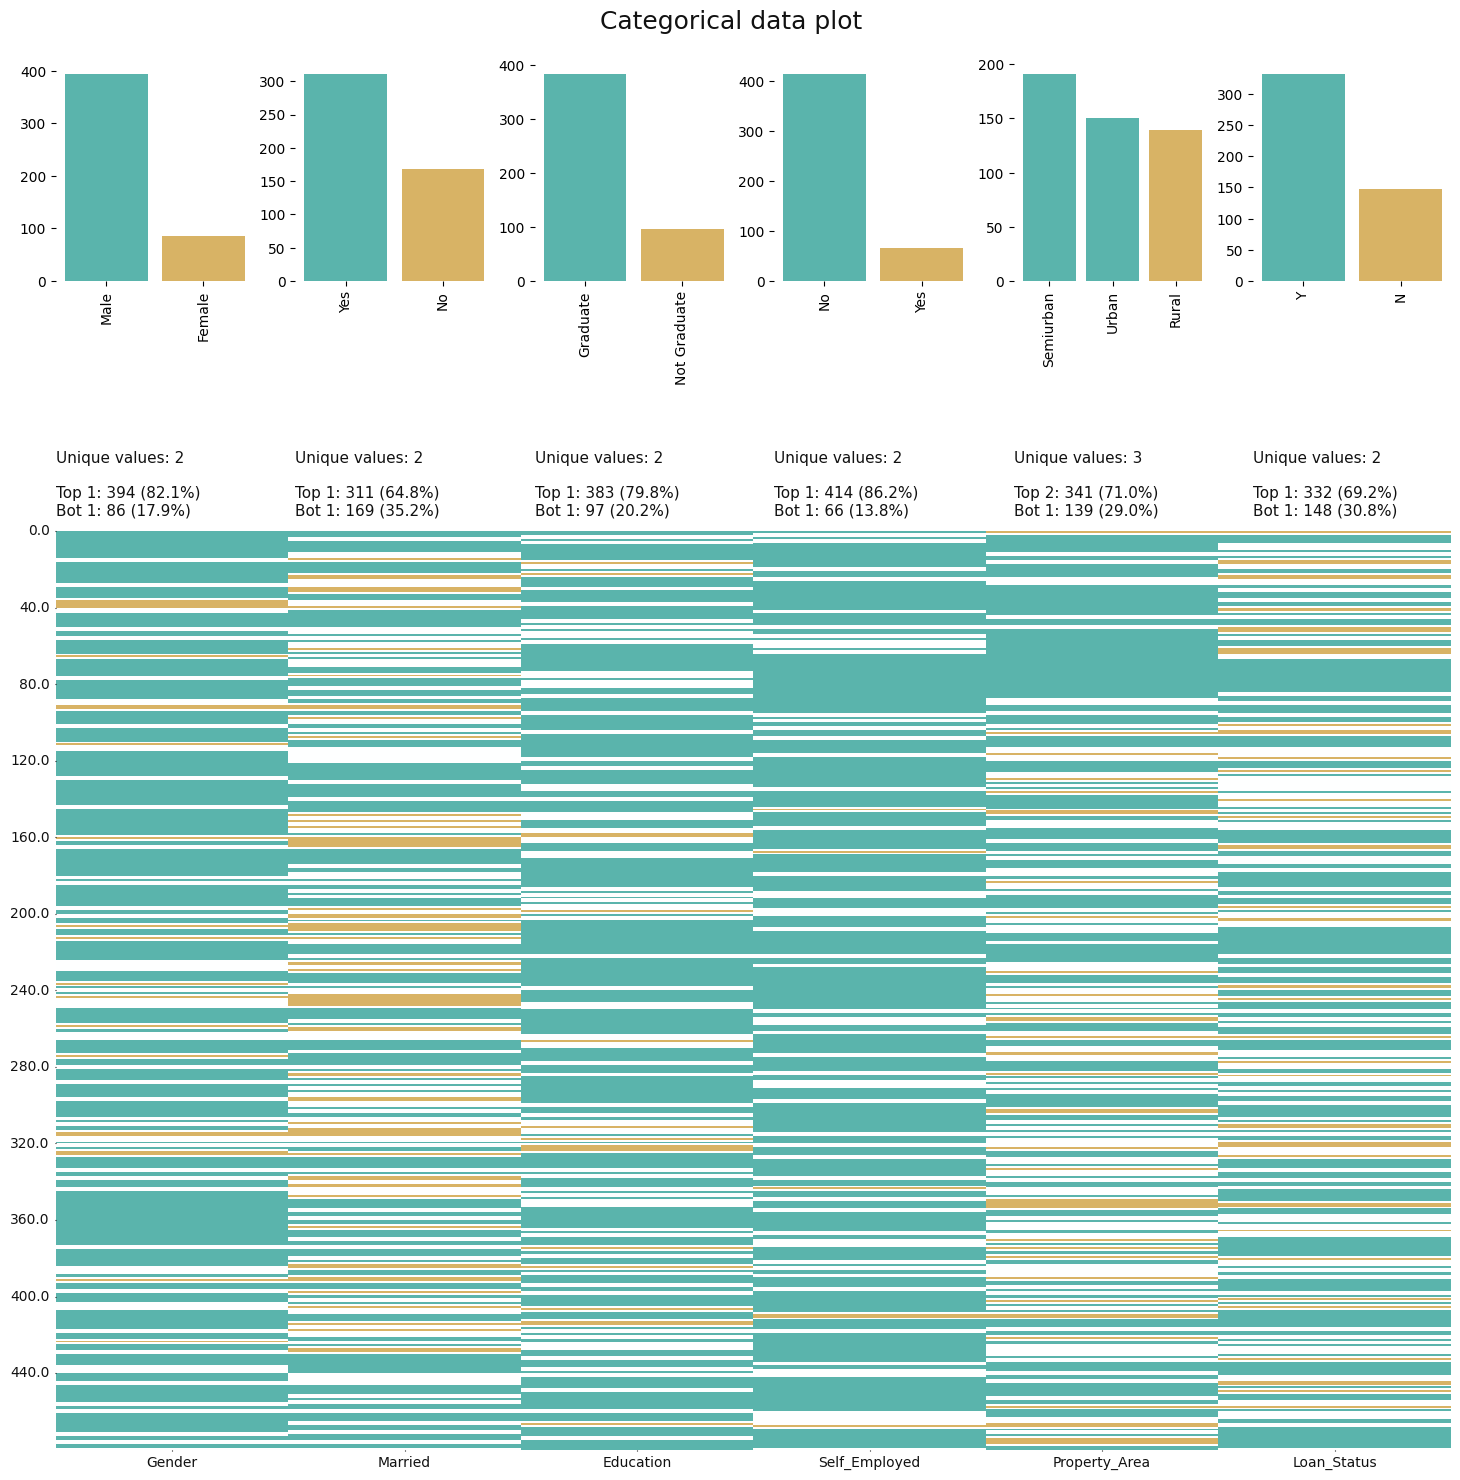

In [22]:
k.cat_plot(df);

### Distribution Plot

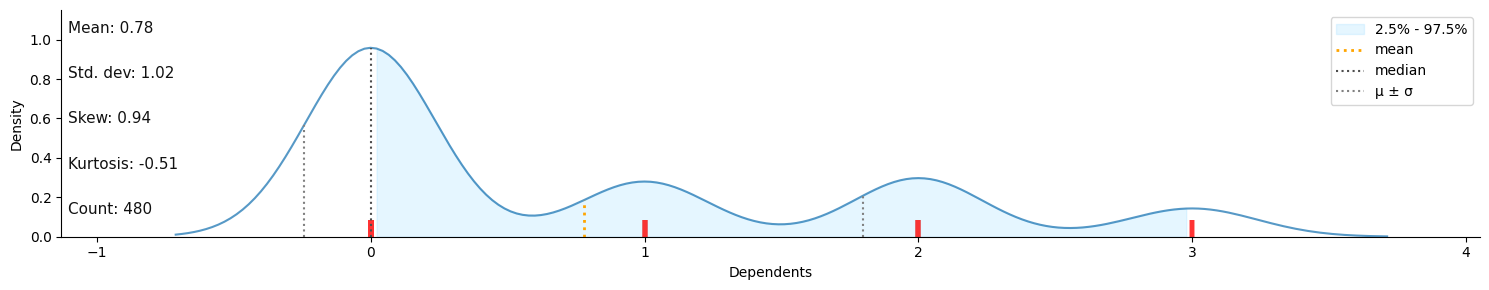

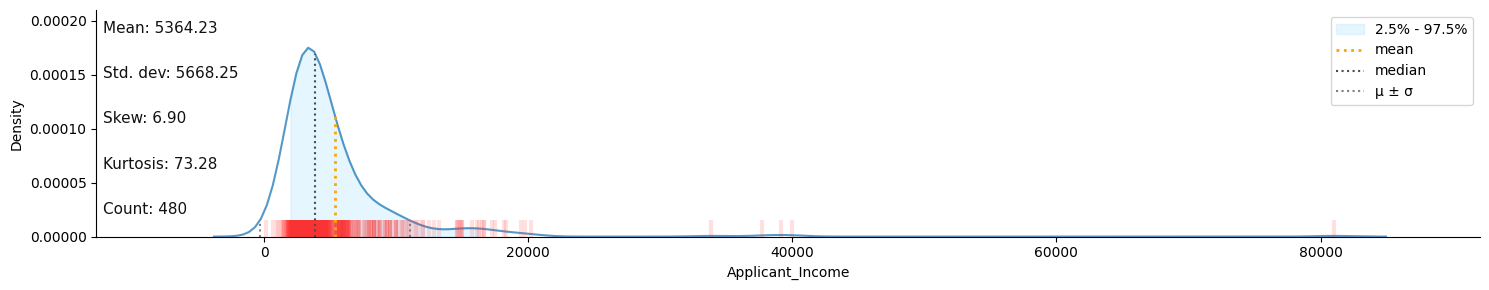

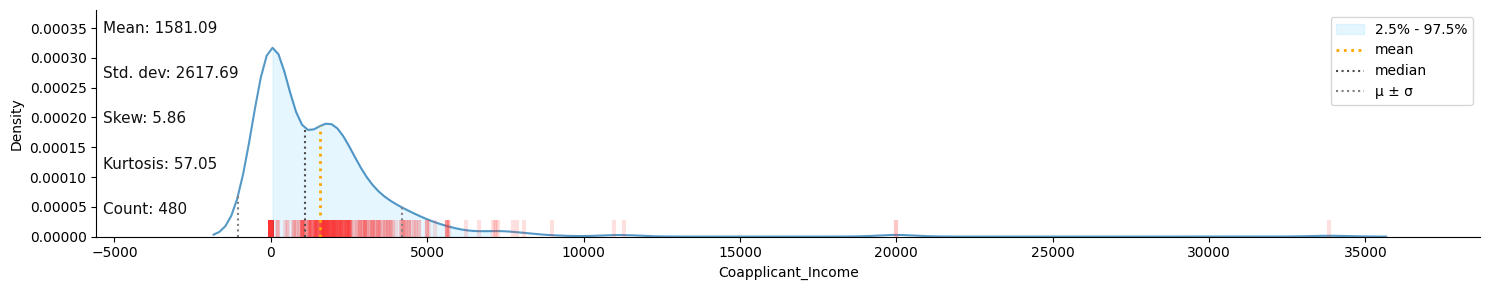

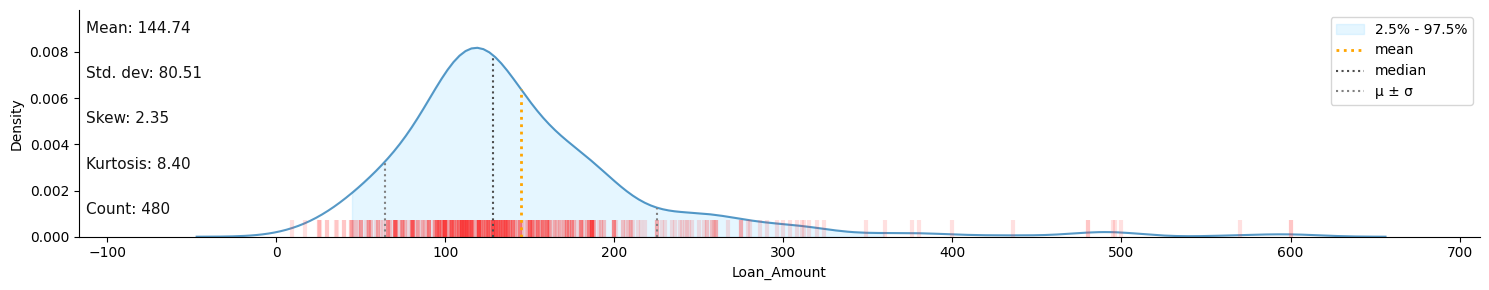

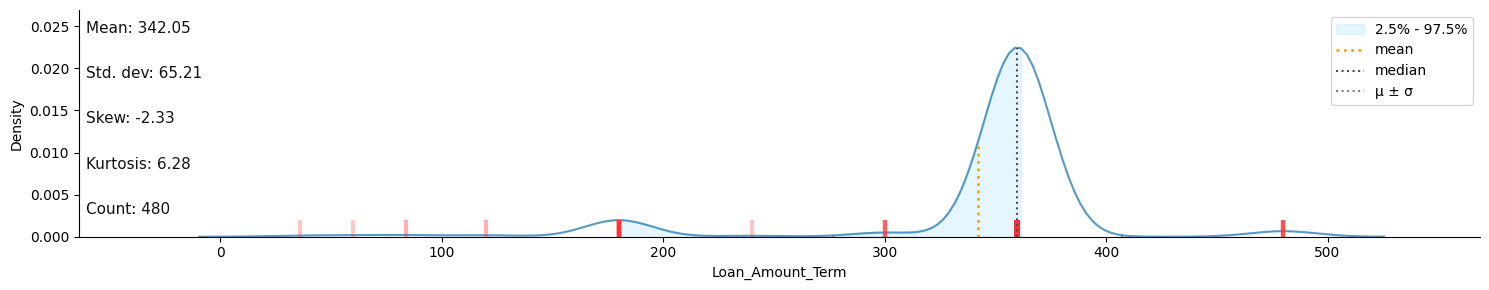

In [23]:
k.dist_plot(df);

#### Histplot

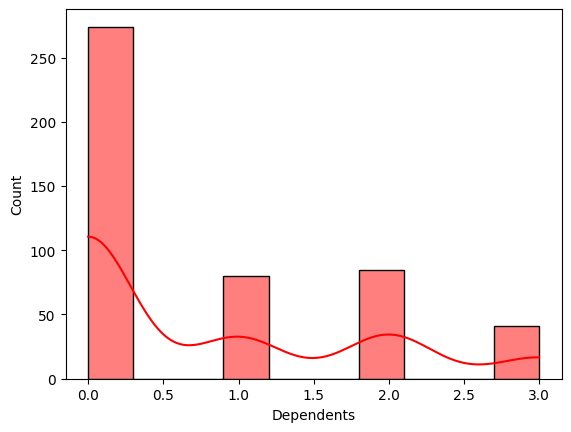

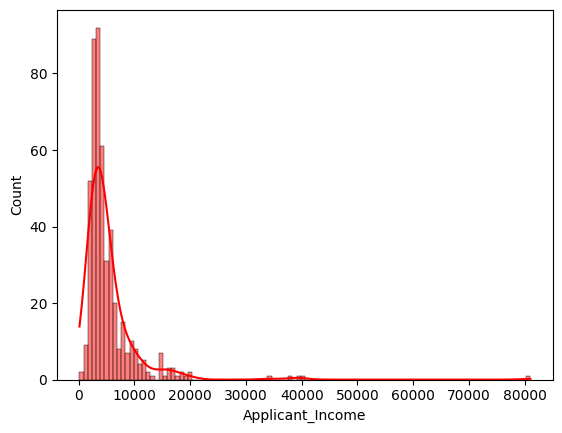

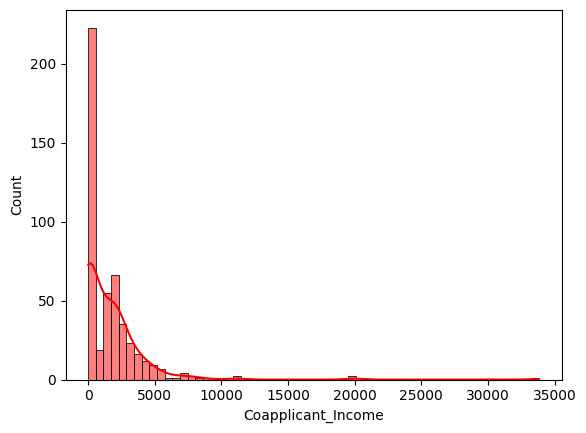

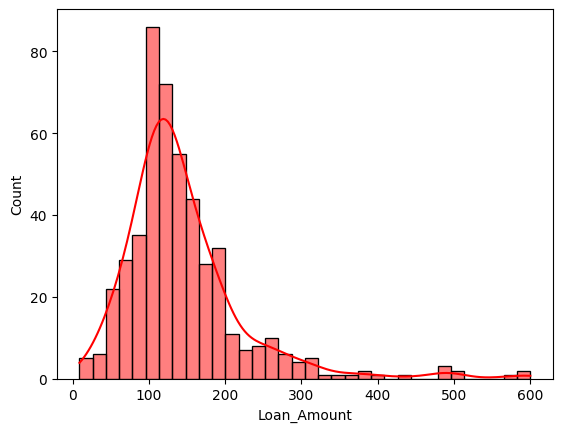

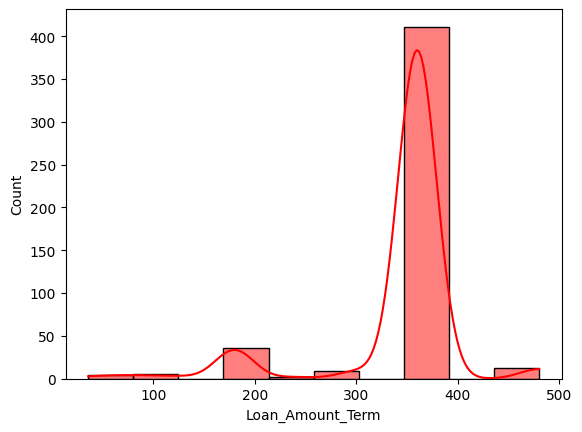

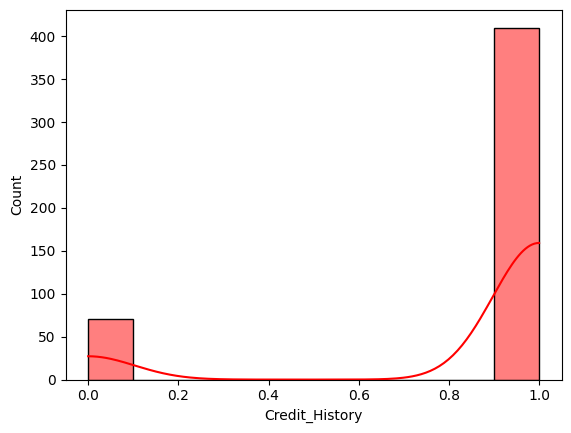

In [24]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.histplot(df, x=df[column], kde=True, color="red")
        plt.show()

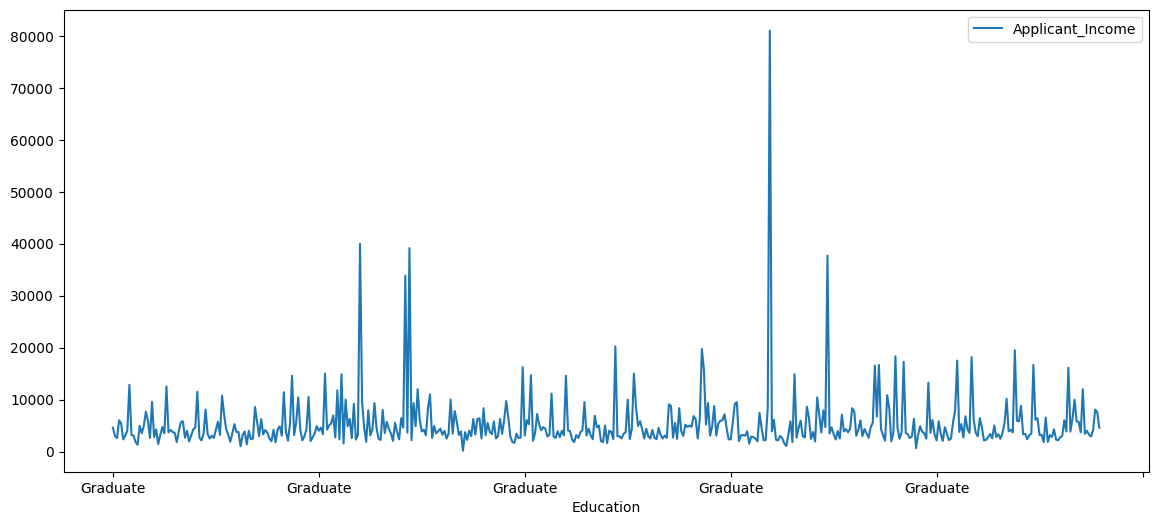

In [25]:
#Education and Applicant_Income
df.plot(x='Education',y='Applicant_Income',figsize=(14,6));

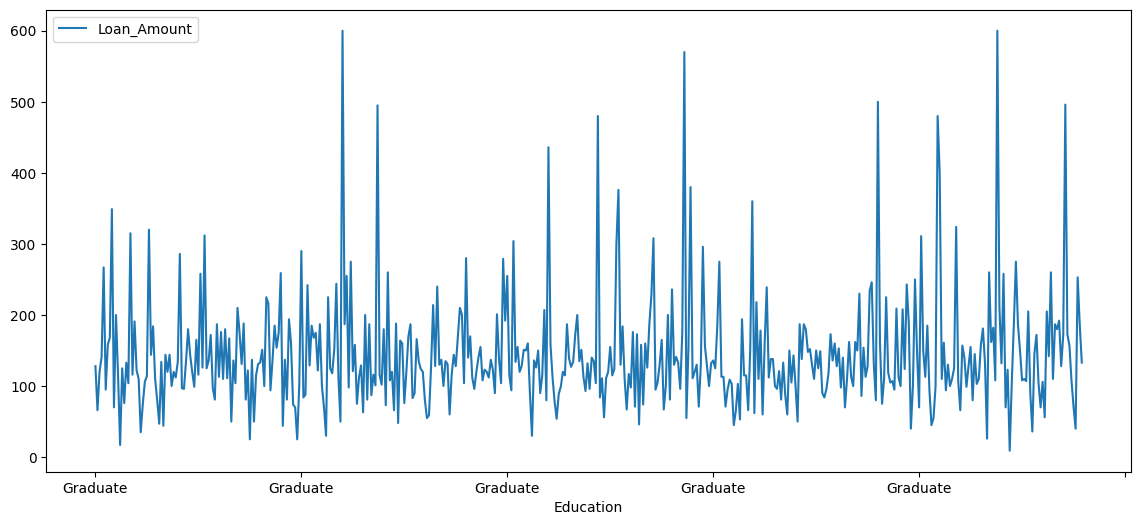

In [26]:
#Education and loan amount
df.plot(x='Education',y='Loan_Amount',figsize=(14,6));

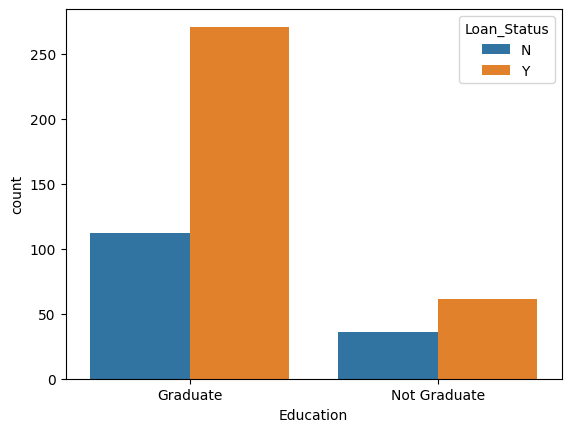

In [27]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=df);

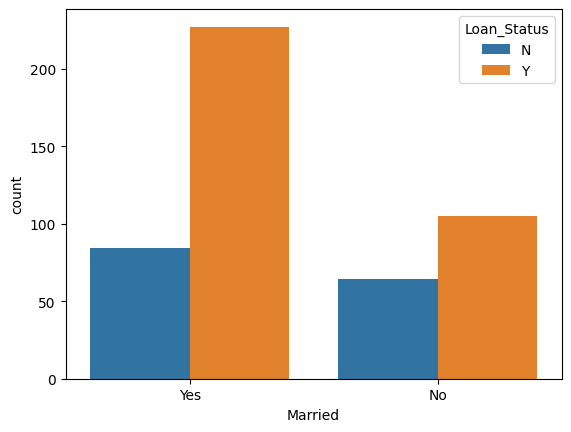

In [28]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=df);

### CHECKING THE BOX PLOT

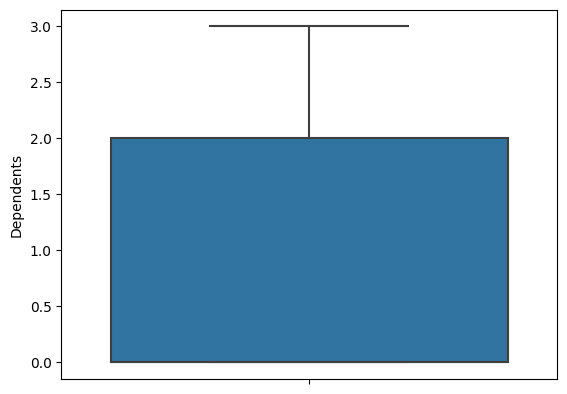

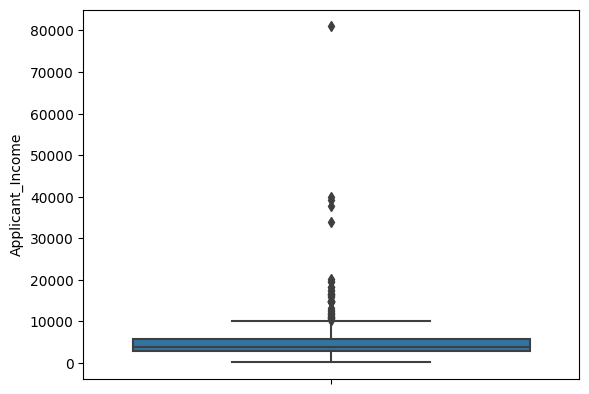

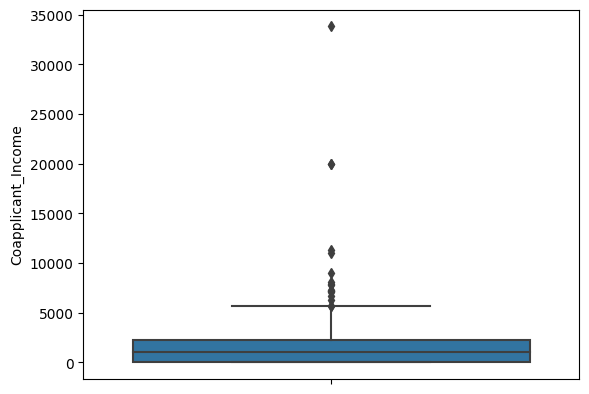

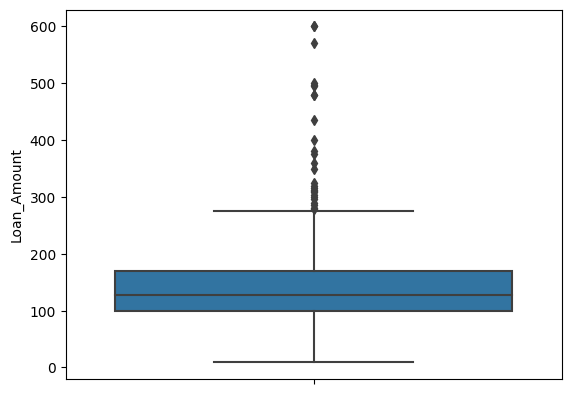

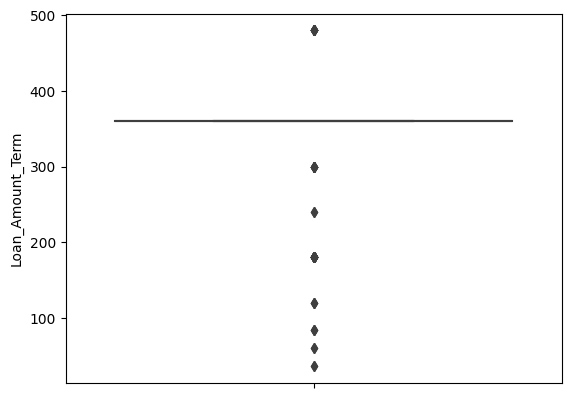

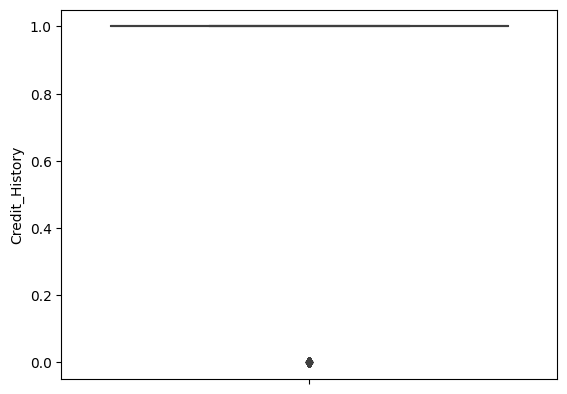

In [29]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column])
        plt.show()

In [30]:
df.isnull().mean()*100

Gender                0.0
Married               0.0
Dependents            0.0
Education             0.0
Self_Employed         0.0
Applicant_Income      0.0
Coapplicant_Income    0.0
Loan_Amount           0.0
Loan_Amount_Term      0.0
Credit_History        0.0
Property_Area         0.0
Loan_Status           0.0
dtype: float64

<div style="background-color: rgba(255, 0, 0, 0.5); padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">LABEL ENCODING</h1>
    
</div>

In [31]:
le=LabelEncoder()

In [32]:
to_transform = ['Loan_Status', 'Gender','Married','Education','Self_Employed','Property_Area']

In [1]:
df.info()

NameError: name 'df' is not defined

In [33]:
for i in to_transform:
    df[i] = le.fit_transform(df[i])

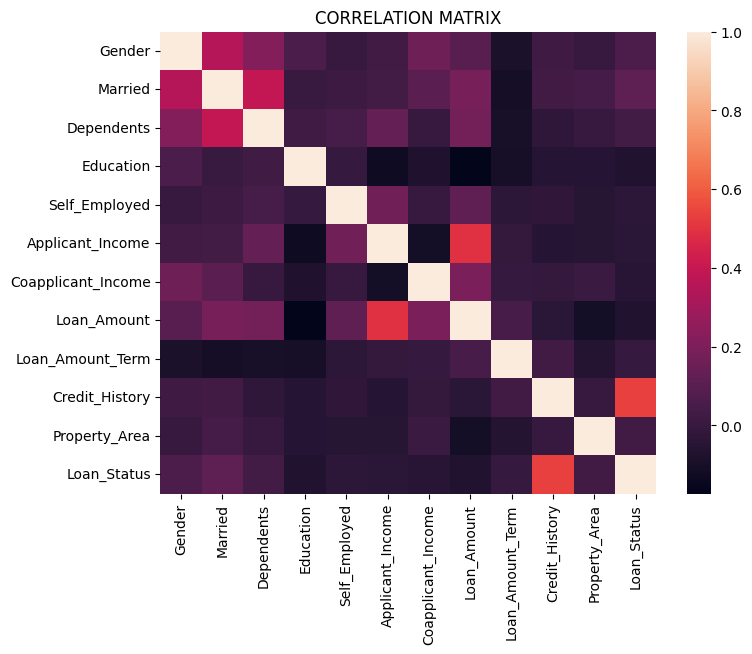

In [34]:
plt.figure(figsize=(8,6))
plt.title("CORRELATION MATRIX")
sns.heatmap(df.corr());

In [35]:
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


<div style="background-color: rgba(255, 0, 0, 0.5); padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">FEATURE ENGINEERING</h1>
    
</div>

In [36]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [37]:
sc= StandardScaler()
x = sc.fit_transform(x)

<div style="background-color: rgba(255, 0, 0, 0.5); padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">MODEL SELECTION</h1>
    
</div>

In [38]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state=42)

In [39]:
print(x.shape, x_train.shape, x_test.shape)

(480, 11) (432, 11) (48, 11)


In [40]:
from sklearn.linear_model import LogisticRegression

<div style="background-color: rgba(255, 0, 0, 0.5); padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">MODEL BUILDING</h1>
    
</div>

In [41]:
model = LogisticRegression()
model.fit(x_train,y_train) 

LogisticRegression()

In [42]:
    model.fit(x_train, y_train)
    print("model trained with {}".format(df))
    score_train =accuracy_score (y_train, model.predict(x_train))
    score_tst = accuracy_score(y_test, model.predict(x_test))
    con_train = confusion_matrix(y_train, model.predict(x_train))
    con_test = confusion_matrix(y_test, model.predict(x_test))
    print("Model accuracy on train is:: ",score_train)
    print("Model accuracy on test is:: ", score_tst)
    print("confusion_matrix train is:: ", con_train)
    print("confusion_matrix test is:: ", con_test)
    print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
    print("*"*60)

model trained with      Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
1         1        1           1          0              0              4583   
2         1        1           0          0              1              3000   
3         1        1           0          1              0              2583   
4         1        0           0          0              0              6000   
5         1        1           2          0              1              5417   
..      ...      ...         ...        ...            ...               ...   
609       0        0           0          0              0              2900   
610       1        1           3          0              0              4106   
611       1        1           1          0              0              8072   
612       1        1           2          0              0              7583   
613       0        0           0          0              1              4583   

     Coapplicant_Inc

In [43]:
y_pred=model.predict(x)

In [44]:
from sklearn.metrics import confusion_matrix,f1_score

<div style="background-color: rgba(255, 0, 0, 0.5); padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Model Evaluation</h1>
    
</div>

In [45]:
confusion_matrix(y_pred,y)

array([[ 64,   8],
       [ 84, 324]], dtype=int64)

In [46]:
f1_score(y_pred,y)

0.8756756756756757

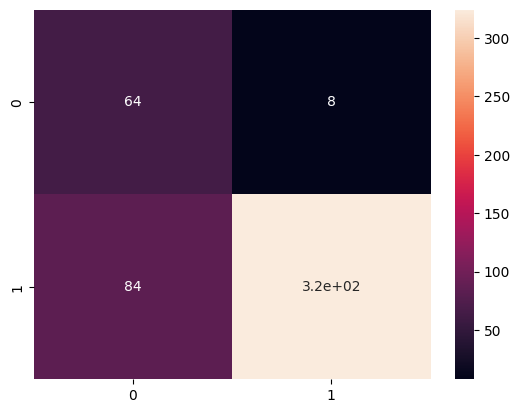

In [47]:
sns.heatmap(confusion_matrix(y_pred,y), annot=True);

In [48]:
f1_score(y,y_pred)

0.8756756756756757

<div style="background-color: rgba(255, 0, 0, 0.5); padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">ROC AOC CURVE</h1>
    
</div>

Model used is::  LogisticRegression()


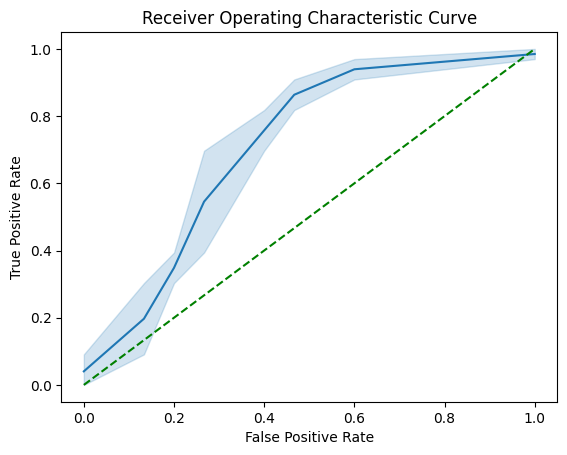

In [49]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()

In [50]:
#Separate the Confusion Matrix reuslt
tp, fn, fp, tn = confusion_matrix(y_pred,y).reshape(-1)
print('This is True Positive: ', tp)
print('This is True Negetive: ', tn)
print('This is False Positive: ', fp)
print('This is False Negetive: ', fn)

This is True Positive:  64
This is True Negetive:  324
This is False Positive:  84
This is False Negetive:  8


<div style="background-color: rgba(255, 0, 0, 0.5); padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Conclusion</h1>
    
</div>

In this analysis,Logistic Regression Confusion matrix, we did extensive analysis of input data and were able to achieve Test Accuracy of 87.5 %